PROJECT OBJECTIVE: Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.
Steps and tasks: [ Total Score: 5 points]
    
1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden
patterns by using all possible methods.

2. Build a data driven model to rank all the players in the dataset using all or the most important performance features.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as  np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("C:/Users/HP/Downloads/batting_bowling_ipl_bat.csv")

In [5]:
df

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,CH Gayle,733,61.08,160.74,46,59,9
1,G Gambhir,590,36.87,143.55,64,17,6
2,V Sehwag,495,33.00,161.23,57,19,5
3,CL White,479,43.54,149.68,41,20,5
4,S Dhawan,569,40.64,129.61,58,18,5
...,...,...,...,...,...,...,...
85,Z Khan,12,6.00,70.58,1,0,0
86,WD Parnell,19,4.75,70.37,2,0,0
87,PC Valthaty,30,5.00,58.82,4,0,0
88,RP Singh,6,3.00,50.00,0,0,0


In [6]:
df.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


In [7]:
df[df.isnull().any(axis=1)]

,Name,Runs,Ave,SR,Fours,Sixes,HF


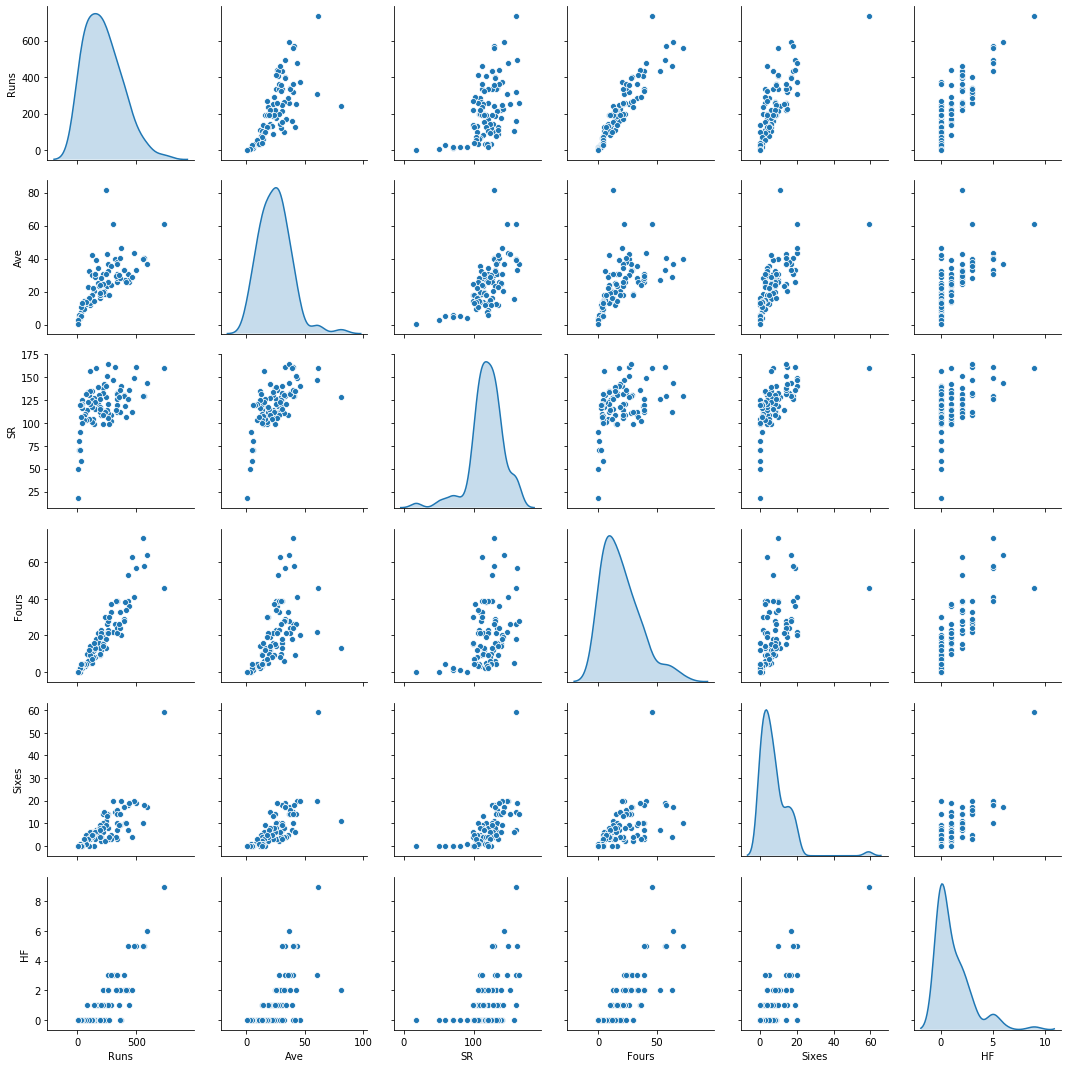

In [10]:
sns.pairplot(df,diag_kind='kde')

In [12]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (90, 7)


In [14]:
df.dtypes

Name      object
Runs       int64
Ave      float64
SR       float64
Fours      int64
Sixes      int64
HF         int64
dtype: object

In [16]:
df.isnull().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

In [28]:
from scipy.stats import zscore

df_attr = df.loc[:, ['Runs','Ave','SR','Fours','Sixes','HF']]
df_attr_z = df_attr.apply(zscore)
array = df_attr_z.values

df_attr_z
val=np.array(df_attr_z)

In [30]:
pca = PCA(1)  # project from 7 to 1 dimensions
projected = pca.fit_transform(val)
print(df.shape)
print(projected.shape)

(90, 7)
(90, 1)


In [31]:
val=np.array(df.drop('Name',axis=1))

In [32]:
val.shape

(90, 6)

In [33]:
projected

array([[ 8.51677407],
       [ 4.61833957],
       [ 4.1422505 ],
       [ 3.89941107],
       [ 4.12007165],
       [ 4.02443639],
       [ 2.87928084],
       [ 2.91901518],
       [ 2.3273886 ],
       [ 2.08164241],
       [ 2.08328069],
       [ 1.77694308],
       [ 2.12516667],
       [ 1.93887249],
       [ 1.72763623],
       [ 1.81713174],
       [ 1.86989515],
       [ 1.44931719],
       [ 1.7957849 ],
       [ 1.83452229],
       [ 0.68521512],
       [ 1.28111282],
       [ 1.23672458],
       [ 1.03374737],
       [ 1.38634619],
       [ 1.18109656],
       [ 0.68373376],
       [ 1.04356191],
       [ 1.02916835],
       [ 0.53160014],
       [ 0.87997561],
       [ 0.66964957],
       [ 1.09641905],
       [ 0.86013096],
       [ 0.32393465],
       [ 0.46475228],
       [ 0.25917713],
       [ 0.24998938],
       [-0.20115976],
       [-0.04807084],
       [ 0.0883086 ],
       [-0.36664347],
       [-0.35836507],
       [-0.56106199],
       [-0.38633634],
       [-0

In [34]:
df['Rating']=projected

In [35]:
df

,Name,Runs,Ave,SR,Fours,Sixes,HF,Rating
0,CH Gayle,733,61.08,160.74,46,59,9,8.516774
1,G Gambhir,590,36.87,143.55,64,17,6,4.618340
2,V Sehwag,495,33.00,161.23,57,19,5,4.142251
3,CL White,479,43.54,149.68,41,20,5,3.899411
4,S Dhawan,569,40.64,129.61,58,18,5,4.120072
...,...,...,...,...,...,...,...,...
85,Z Khan,12,6.00,70.58,1,0,0,-3.006639
86,WD Parnell,19,4.75,70.37,2,0,0,-3.000751
87,PC Valthaty,30,5.00,58.82,4,0,0,-3.070959
88,RP Singh,6,3.00,50.00,0,0,0,-3.422022


In [38]:
df.sort_values(by='Rating',ascending=False,inplace=True)

In [41]:
df.head(20)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Rating
0,CH Gayle,733,61.08,160.74,46,59,9,8.516774
1,G Gambhir,590,36.87,143.55,64,17,6,4.618340
2,V Sehwag,495,33.00,161.23,57,19,5,4.142251
4,S Dhawan,569,40.64,129.61,58,18,5,4.120072
5,AM Rahane,560,40.00,129.33,73,10,5,4.024436
3,CL White,479,43.54,149.68,41,20,5,3.899411
7,RG Sharma,433,30.92,126.60,39,18,5,2.919015
6,KP Pietersen,305,61.00,147.34,22,20,3,2.879281
8,AB de Villiers,319,39.87,161.11,26,15,3,2.327389
12,F du Plessis,398,33.16,130.92,29,17,3,2.125167


In [53]:
values=np.array(range(1,91))
df['Rank']=values

In [56]:
df.head(20)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Rating,Rank
0,CH Gayle,733,61.08,160.74,46,59,9,8.516774,1
1,G Gambhir,590,36.87,143.55,64,17,6,4.618340,2
2,V Sehwag,495,33.00,161.23,57,19,5,4.142251,3
4,S Dhawan,569,40.64,129.61,58,18,5,4.120072,4
5,AM Rahane,560,40.00,129.33,73,10,5,4.024436,5
3,CL White,479,43.54,149.68,41,20,5,3.899411,6
7,RG Sharma,433,30.92,126.60,39,18,5,2.919015,7
6,KP Pietersen,305,61.00,147.34,22,20,3,2.879281,8
8,AB de Villiers,319,39.87,161.11,26,15,3,2.327389,9
12,F du Plessis,398,33.16,130.92,29,17,3,2.125167,10
